In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Text(0.5, 1.0, 'Distribution of Charges')

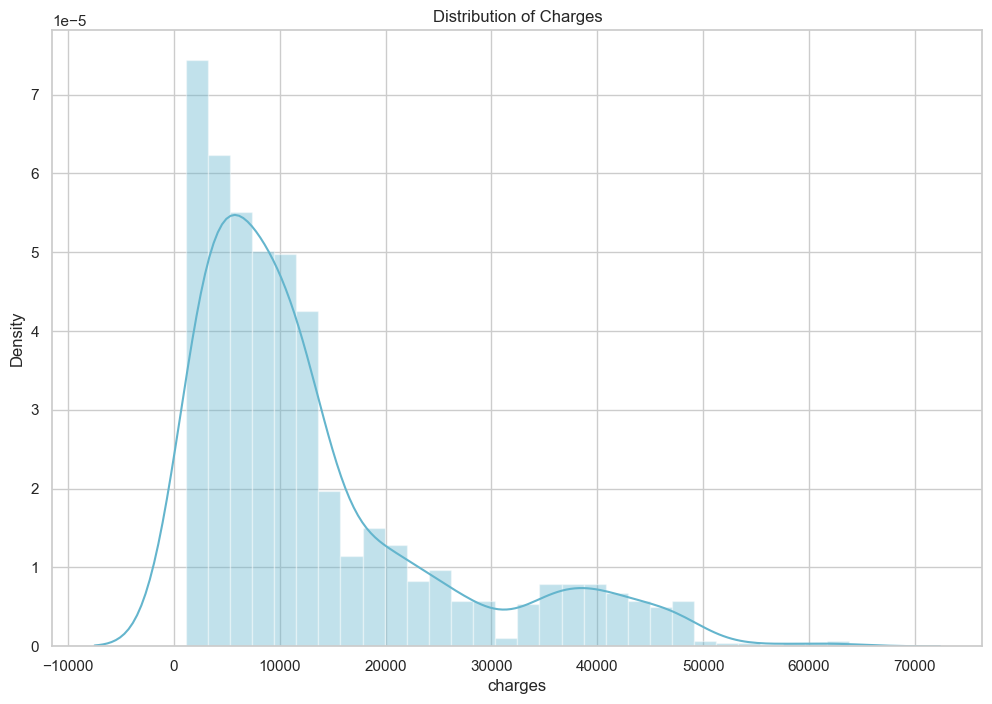

In [9]:
sns.set(style='whitegrid')
f,ax=plt.subplots(1,1,figsize=(12,8))
ax=sns.distplot(df['charges'],kde=True,color='c')
plt.title('Distribution of Charges')

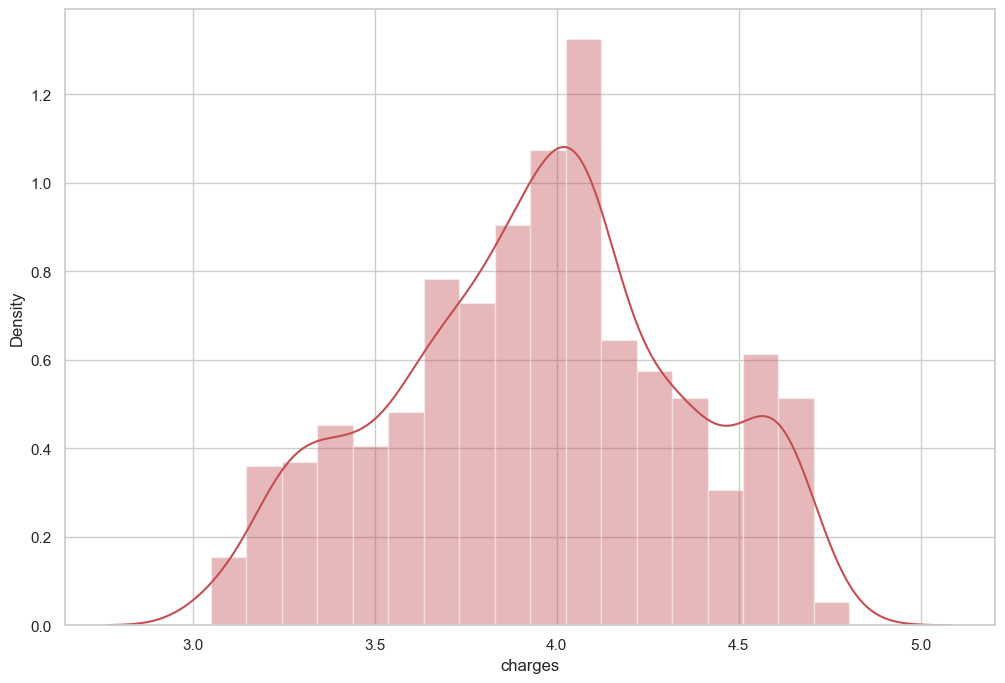

In [10]:
f,ax=plt.subplots(1,1,figsize=(12,8))
ax=sns.distplot(np.log10(df['charges']),kde=True,color='r')

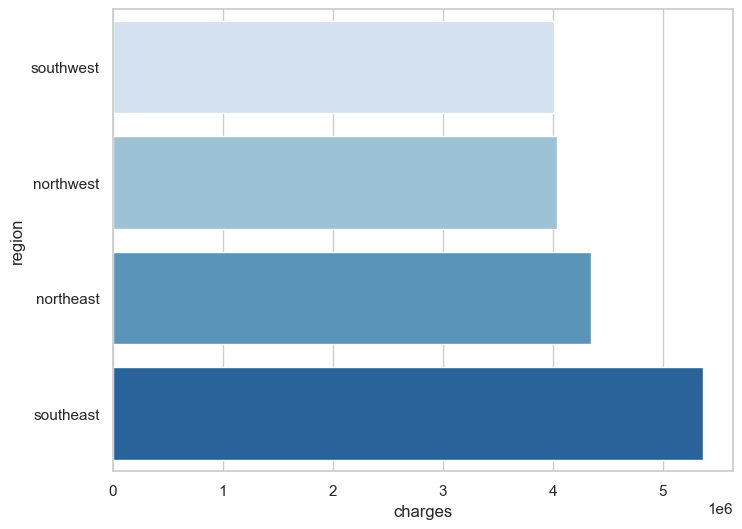

In [11]:
charges=df['charges'].groupby(df.region).sum().sort_values(ascending=True)
f,ax=plt.subplots(1,1,figsize=(8,6))
ax=sns.barplot(x=charges.head(),y=charges.head().index,palette='Blues')

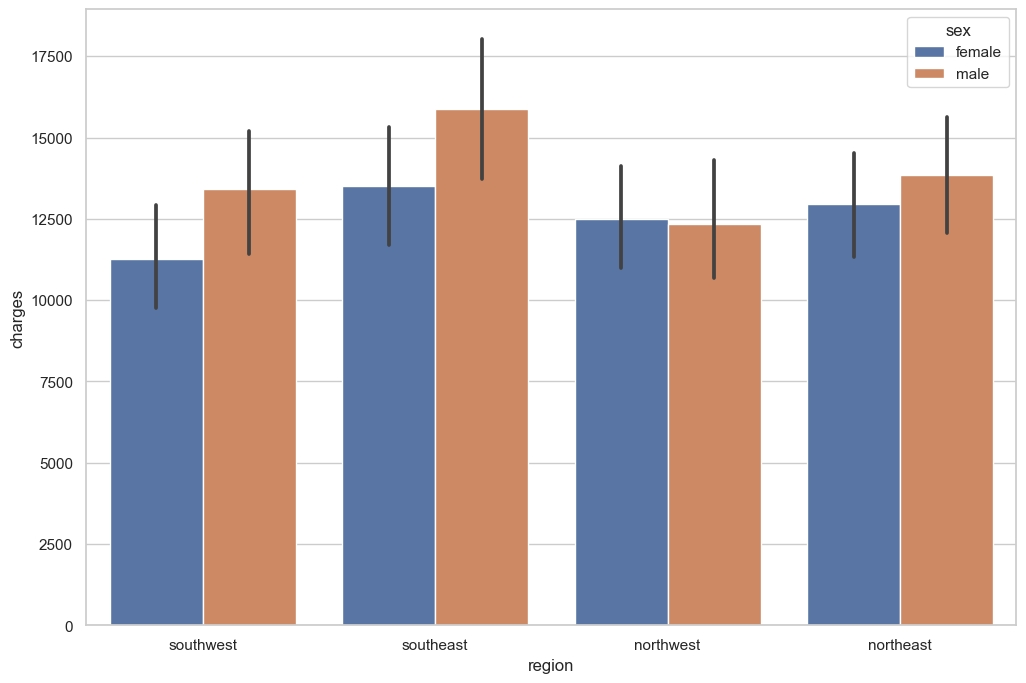

In [12]:
f,ax=plt.subplots(1,1,figsize=(12,8))
ax=sns.barplot(x='region',y='charges',hue='sex',data=df)

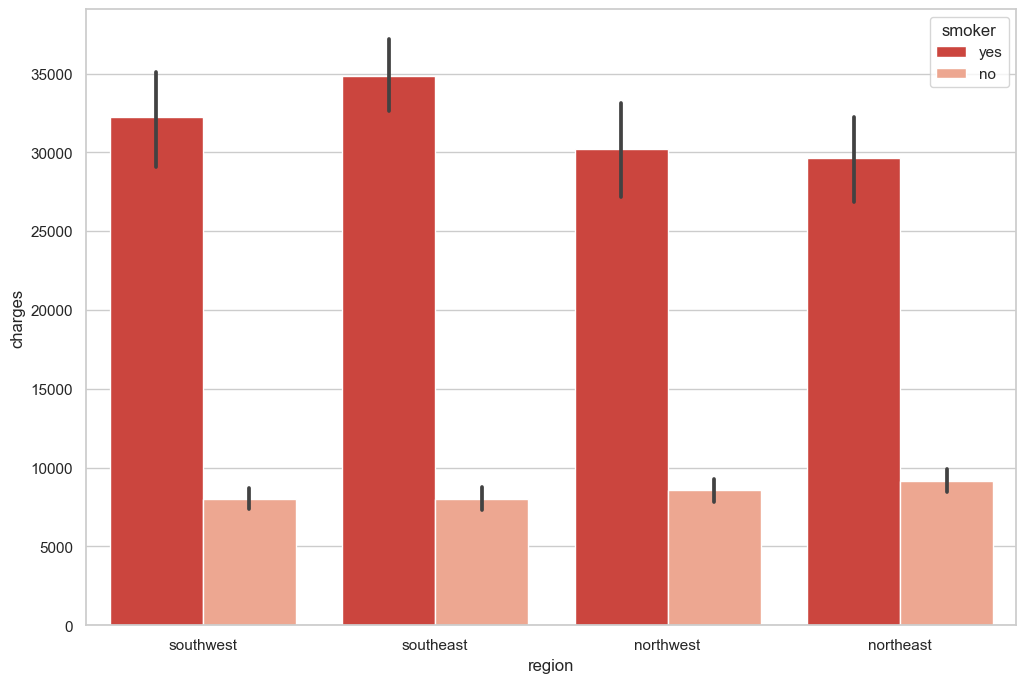

In [13]:
f,ax=plt.subplots(1,1,figsize=(12,8))
ax=sns.barplot(x='region',y='charges',hue='smoker',data=df,palette='Reds_r')

In [18]:
df['children']=df['children'].astype(str)

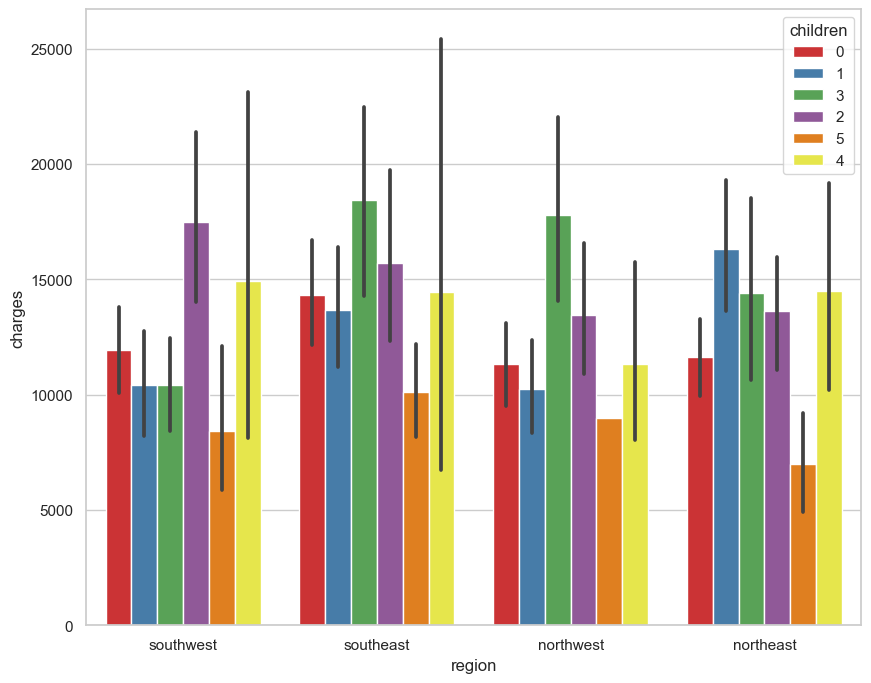

In [19]:
f,ax=plt.subplots(1,1,figsize=(10,8))
ax=sns.barplot(x='region',y='charges',hue='children',data=df,palette='Set1')

In [27]:
df['children']=df['children'].astype(int)
df['bmi']=df['bmi'].astype(int)

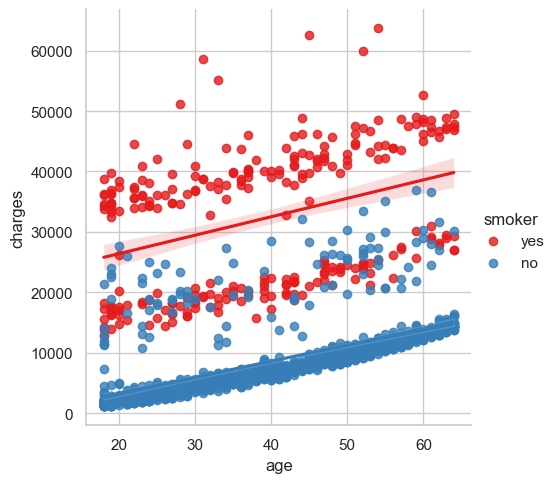

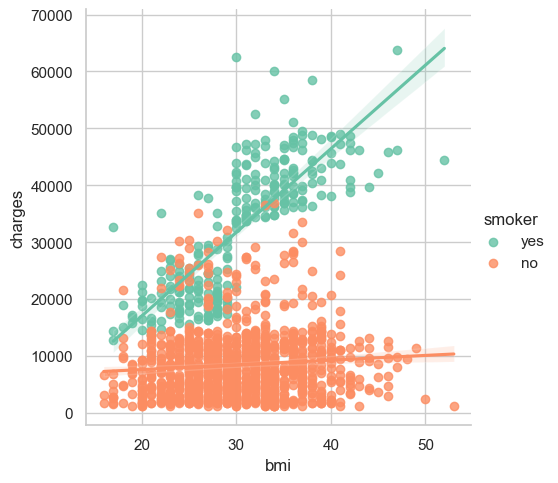

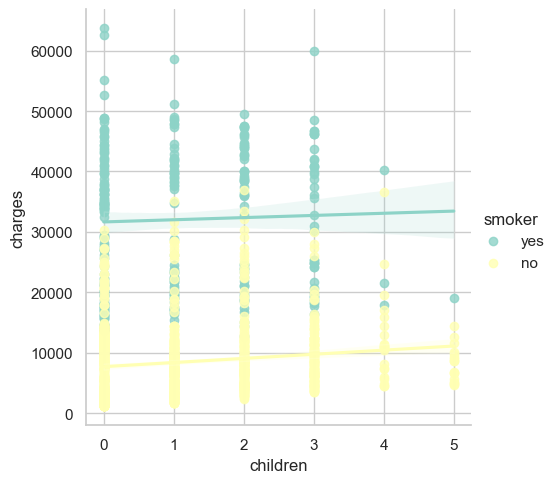

In [28]:
ax=sns.lmplot(x='age',y='charges',data=df,hue='smoker',palette='Set1')
ax=sns.lmplot(x='bmi',y='charges',data=df,hue='smoker',palette='Set2')
ax=sns.lmplot(x='children',y='charges',data=df,hue='smoker',palette='Set3')

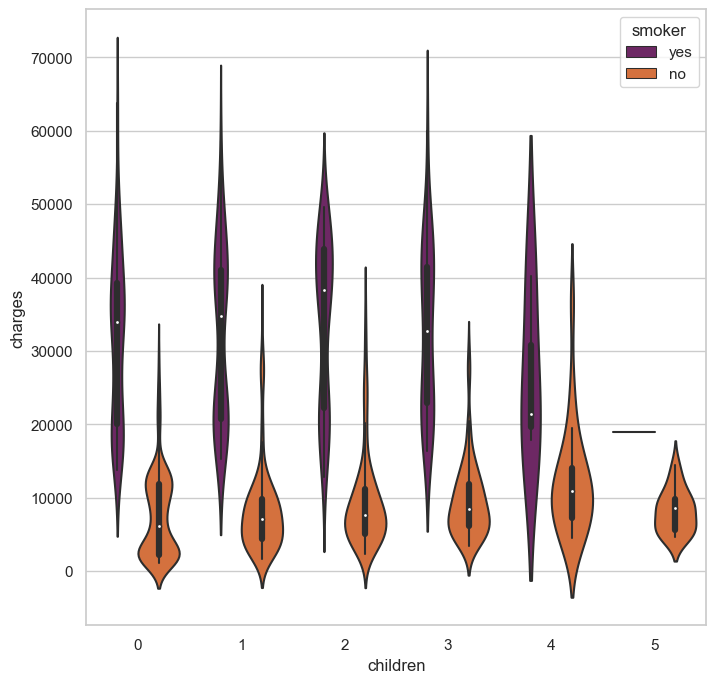

In [30]:
f,ax=plt.subplots(1,1,figsize=(8,8))
ax=sns.violinplot(x='children',y='charges',data=df,hue='smoker',orient='v',palette='inferno')

In [32]:
##converting objects labels into categorical
df[['sex','smoker','region']]=df[['sex','smoker','region']].astype('category')
df.dtypes

age            int64
sex         category
bmi            int32
children       int32
smoker      category
region      category
charges      float64
dtype: object

In [34]:
#converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex=label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker=label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region=label.transform(df.region)
df.dtypes 

age           int64
sex           int64
bmi           int32
children      int32
smoker        int64
region        int32
charges     float64
dtype: object

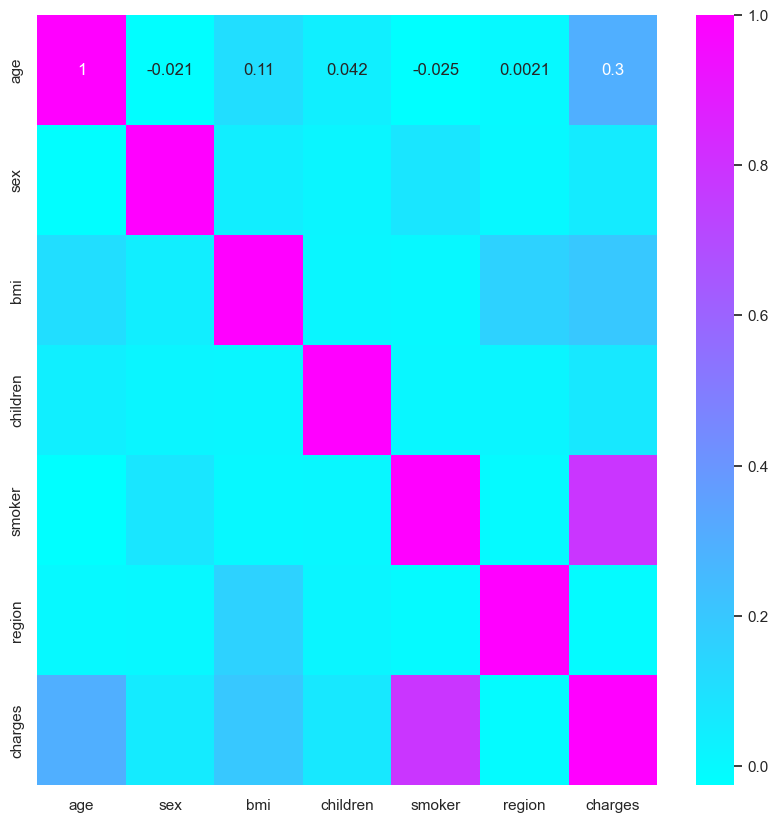

In [35]:
f,ax=plt.subplots(1,1,figsize=(10,10))
ax=sns.heatmap(df.corr(),annot=True,cmap='cool')